## Example 6.2, Generate state estimates and RMSE for Random Walk for TD learning and MC

In [1]:
#%%libraries
import numpy as np
import matplotlib.pyplot as plt
import pdb
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#%%model initialisations
class Grid():
    def __init__(self):
        self.row = 7
        self.state = np.empty((self.row))
        self.state_value = {}
        value = 1
        for i in range(self.row):
            self.state[i] = value
            self.state_value[value] = 0
            value+=1

        self.state_value[1] = 0
        self.state_value[7] = 0
        for j in range(2,self.row):
            self.state_value[j] = 0



        #action space
        self.action = {10: 'right', 11: 'left'}

    def transition(self,action,state):
        reward = 0
        state1 = np.inf
        if state in (self.state[1],self.state[2],self.state[3],self.state[4]):
            if action == self.action[10]: #right
                reward = 0
                state1 = state + 1
            if action == self.action[11]: #left
                reward = 0
                state1 = state - 1

        if state == self.state[5]:
            if action == self.action[10]:  #right
                reward = 1
                state1 = state + 1
            if action == self.action[11]:  #left
                reward = 0
                state1 = state - 1
        return state1, reward

## Error for alpha = 0.15, consolidated graphs for all alphas are added in the report

Episode :  0 [4.0, 3.0, 2.0, 1.0] [0, 0, 0]
Episode :  1 [4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 0, 0, 1]
Episode :  2 [4.0, 3.0, 2.0, 1.0] [0, 0, 0]
Episode :  3 [4.0, 5.0, 6.0, 7.0] [0, 0, 1]
Episode :  4 [4.0, 5.0, 4.0, 5.0, 6.0, 5.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 5.0, 6.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Episode :  5 [4.0, 3.0, 2.0, 1.0] [0, 0, 0]
Episode :  6 [4.0, 5.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 6.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Episode :  7 [4.0, 3.0, 4.0, 3.0, 4.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 0, 0, 1]
Episode :  8 [4.0, 3.0, 4.0, 5.0, 4.0, 3.0, 2.0, 1.0] [0, 0, 0, 0, 0, 0, 0]
Episode :  9 [4.0, 3.0, 2.0, 3.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Episode :  10 [4.0, 5.0, 6.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 1]
Episode :  11 [4.0, 5.0, 4.0, 5.0, 6.0, 7.0] [0, 0, 0, 0, 1]
Episode :  12 [4.0, 3.0, 2.0, 3.0, 2.0, 1.0] [0, 0, 0, 0, 0]
Episode :  13 [4.0, 5.0, 6.0, 5.0, 4.0, 5

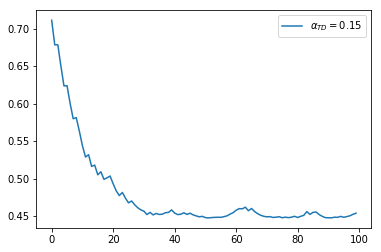

In [3]:
#%%TD learning
g = Grid()

episodes = 100

runs = 1

gamma  = 1

alpha = 0.15

num_states = g.row


loop = True

total_errors = np.zeros(episodes)

true_values = np.zeros(7)
true_values[1:6] = np.arange(1, 6) / 6.0
true_values[6] = 1

for r in range(runs):

    errors  = []



    for k_epi in range(episodes):

        #for states in each episode
        state_episode = []

        #for rewards in each episode
        rew_ep = []

        #always start with State C
        new_state = g.state[3]
        state_episode.append(new_state)
        #pdb.set_trace()
        loop = True

        while loop == True:
            act_n = np.arange(10,12)

            #choosing a random action
            a = g.action[np.random.choice(act_n)]

            [state_forward, rew] = g.transition(a,state_episode[-1])

            g.state_value[state_episode[-1]] = g.state_value[state_episode[-1]] + \
                alpha*(rew + g.state_value[state_forward] - g.state_value[state_episode[-1]])

            state_episode.append(state_forward)
            rew_ep.append(rew)

            new_state = state_forward

            if new_state == g.state[0] or new_state == g.state[6]:
                loop = False
                current_values = np.copy(list(g.state_value.values()))
                errors.append(np.sqrt(np.sum(np.power(true_values - current_values , 2)) / 5.0))
        if np.mod(k_epi,1) == 0:
            print('Episode : ',k_epi,state_episode,rew_ep)
            #print('Episode : ',k_epi)
    total_errors += (errors)
    
total_errors/= runs
plt.plot(total_errors, label = r'$\alpha_{TD} = $' + str(alpha))
plt.legend()

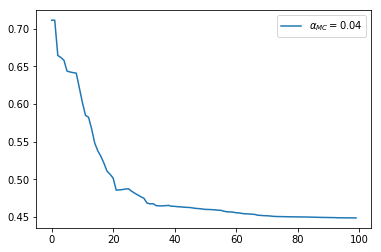

In [4]:
#%%MC errors for RMSE
g = Grid()

episodes = 100

runs = 1

gamma  = 1

alpha = 0.04

num_states = g.row


loop = True

total_errors = np.zeros(episodes)

true_values = np.zeros(7)
true_values[1:6] = np.arange(1, 6) / 6.0
true_values[6] = 1

ret_states = {}

for i in range(num_states):
    ret_states[g.state[i]] = []

for r in range(runs):

    errors  = []
    for k_epi in range(episodes):

        #for states in each episode
        state_episode = []

        #for rewards in each episode
        rew_ep = []

        #always start with State C
        new_state = g.state[3]
        state_episode.append(new_state)
        #pdb.set_trace()
        loop = True
        
        #for tracking when does a episode ends
        loop_exit = False

        #start an episode
        while loop == True:
            act_n = np.arange(10,12)

            #choosing a random action
            a = g.action[np.random.choice(act_n)]

            [state_forward, rew] = g.transition(a,state_episode[-1])

            state_episode.append(state_forward)
            rew_ep.append(rew)

            new_state = state_forward

            if new_state == g.state[0] or new_state == g.state[6]:
                loop = False
                loop_exit = True
                
            
        if loop_exit == True:
            G = 0
            counter = 1
            for j in range((len(rew_ep)-1),-1,-1):
                G = gamma * G + rew_ep[j]
                last_value = state_episode[j]
                update_G = True
                if update_G :
                    ret_states[last_value].append(G)
                    g.state_value[last_value] = g.state_value[last_value] +\
                    alpha*(np.mean(ret_states[last_value]) - g.state_value[last_value])
            current_values = np.copy(list(g.state_value.values()))
            errors.append(np.sqrt(np.sum(np.power(true_values - current_values , 2)) / 5.0))
    
    total_errors += (errors)

total_errors/= runs
plt.plot(total_errors, label = r'$\alpha_{MC} = $' + str(alpha))
plt.legend()

## State estimates for episodes 100

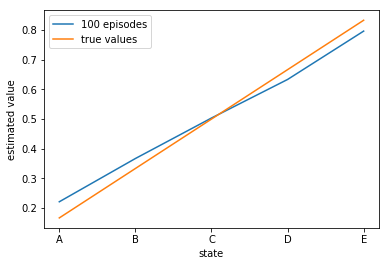

In [6]:
#%%
true_values = [1/6 , 2/6, 3/6, 4/6, 5/6]
current_values = []
episodes = [0, 1, 10, 100]
for j in range(2,7):
    current_values.append(g.state_value[j])
plt.plot(current_values, label=str(100) + ' episodes')
plt.plot(true_values, label='true values')
plt.xticks(np.arange(5),('A','B','C','D','E'))
plt.xlabel('state')
plt.ylabel('estimated value')
plt.legend()